This note book calulates micro strip impedance

Dimensions are as shown below
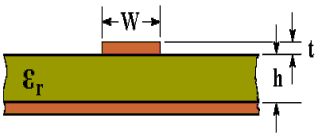

**Note**: all of the implementations below assume that the same units are used for all dimensions. However they can be any units (ie all mm, all in 1/thousandths of an inch, etc)

In [1]:
# Modify the values here, and hit run
w = 21.5  # Trace Width
t = 1.57  # Trace thickness (height)
h = 12.79 # Delectric height
Er = 4.04 # Relative Dielectric Constant (Isola 370HR)

# IPC-2141 Calculation

Expected values come from implementation at [www.chemandy.com](http://www.chemandy.com/calculators/microstrip-transmission-line-calculator-ipc2141.htm)

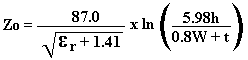

In [5]:
# http://www.chemandy.com/calculators/microstrip-transmission-line-calculator-ipc2141.htm
from math import sqrt, log, pi, exp

def z_ipc(w,t,h,Er):
    Zo = 87 / sqrt(Er + 1.41) * log( (5.98*h)/(0.8*w +t) )
    return Zo
Zo = z_ipc(w,t,h,Er)
print('Calc: ' +str(Zo) +' Expected: 52.35')

Calc: 77.45702051405988 Expected: 52.35


# Wadell Calculation
Microstrip Transmission Line Characteristic Impedance Calculator Using an Equation by Brian C Wadell

Expected values from implementation at [www.chemandy.com](http://www.chemandy.com/calculators/microstrip-transmission-line-calculator.htm)

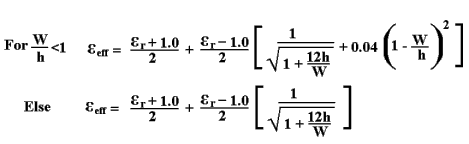




In [6]:
def wh_eff(w,h,Er):
    if w/h < 1:
        Eff = (Er +1.0)/2 + ((Er -1.0)/2) * ( 1/sqrt(1.0 +12.0*h/w) +0.04*(1.0 -w/h)**2)
    else:
        Eff = (Er +1.0)/2 + ((Er -1.0)/2) * ( 1/sqrt(1.0 +12.0*h/w) )
    return Eff
Eff = wh_eff(w,h,Er)
print('Calc: ' +str(Eff) +' Expected: 3.053')

Calc: 2.898826862021064 Expected: 3.053


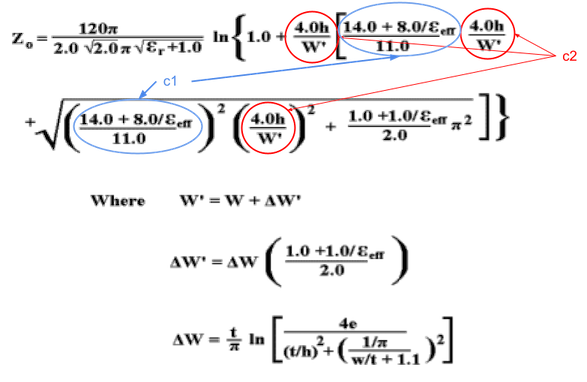

In [7]:
def z_wadell(w,t,h,Er):
    Eff = wh_eff(w,h,Er)
    
    delta_w = (t/pi) * log(4.0*exp(1.0) / ((t/h)**2 + ((1.0/pi)/(w/t +1.1))**2))
    delta_w_star = delta_w * (1.0 + 1.0/Eff)/2
    w_star = w + delta_w_star
            
    hws = h/w_star
    c1 = (14.0+8.0/Eff)/11.0
    c2 = 4.0*h/w_star
    Zo = 120*pi/(2.0*sqrt(2.0)*pi*sqrt(Er+1.0))
    Zo = Zo * log(1.0 +c2*( c1*c2 + sqrt(c1**2 * c2**2 + ((1.0+1.0/Eff)/2)*pi**2)
                          )
                 )
    return Zo

Zo = z_wadell(w,t,h,Er)
print('Calc: ' +str(Zo) +' Expected: 53.57')

Calc: 76.37809376155164 Expected: 53.57


# Hartley Calculation
Microstrip Transmission Line Characteristic Impedance Calculator Using an Equation by Rick Hartley

Expected values from implementation at [www.chemandy.com](http://www.chemandy.com/calculators/microstrip-transmission-line-calculator-hartley27.htm)

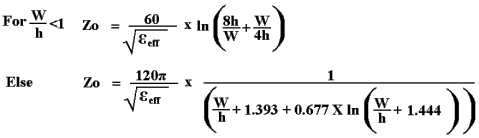

**Note**: the Hartley equations use the same calculation for Eff as Wadell uses

In [8]:
def z_hartley(w,t,h,Er):
    Eff = wh_eff(w,h,Er) # Same calculation as for Wadell
    if w/h < 1.0:
        Zo = (60/sqrt(Eff)) * log(8.0*h/w + w/(4.0*h))
    else:
        Zo = (120*pi/sqrt(Eff)) * 1/(w/h +1.393 +0.677*log(w/h+1.444))
    return Zo
Zo = z_hartley(w,t,h,Er)
print('Calc: ' +str(Zo) +' Expected: 56.11')

Calc: 82.61898003290597 Expected: 56.11


# Analyze Input Parameters

In [20]:
import numpy as np

w = 21.5  # Trace Width
t = 1.57  # Trace thickness (height)
h = 12.79 # Delectric height
Er = 4.4 # Relative Dielectric Constant

zo_ipc = []
zo_wadell = []
zo_hartley = []

np_w = np.linspace(8,30)
for w in np_w:
    zo_ipc.append( z_ipc(w,t,h,Er) )
    zo_wadell.append( z_wadell(w,t,h,Er) )
    zo_hartley.append( z_hartley(w,t,h,Er) )
    
np_zo_ipc = np.array( zo_ipc )
np_zo_wadell = np.array( zo_wadell )
np_zo_hartley = np.array( zo_hartley )

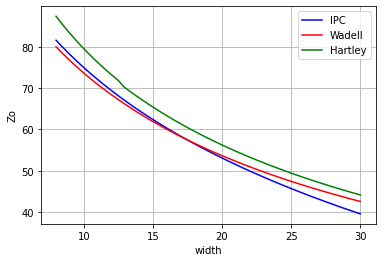

In [21]:
import matplotlib.pyplot as plt

plt.plot(np_w, np_zo_ipc, 'b',
         np_w, np_zo_wadell, 'r',
         np_w, np_zo_hartley, 'g'
        )
plt.legend(['IPC', 'Wadell', 'Hartley'])
plt.xlabel('width')
plt.ylabel('Zo')
plt.grid('on')

# References

* Another impedance calculator at [pcbway](https://www.pcbway.com/pcb_prototype/impedance_calculator.html)
* (Wcalc v1.1)[http://wcalc.sourceforge.net/index.html] was one of my favorite microstrip calculators, but it has not been updated in ages.